In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
import io

In [4]:
# 보험담보정보
df1= pd.read_csv("SDB4_I_CT_MGG_PVT.csv", encoding ='UTF8')

In [130]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408171 entries, 0 to 1408170
Data columns (total 35 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   JOIN_SN      1408171 non-null  int64 
 1   JOIN_SN_TYP  1408171 non-null  int64 
 2   SCTR_CD      1408171 non-null  int64 
 3   POL_SN       1408171 non-null  int64 
 4   MGG_GRP_CD   1408171 non-null  object
 5   MGG_CD       1408171 non-null  object
 6   MGG_CNT      1408171 non-null  int64 
 7   MGG_AMT_SUM  1408171 non-null  int64 
 8   MGG_AMT_MAX  1408171 non-null  int64 
 9   MGG_AMT_MIN  1408171 non-null  int64 
 10  YM_201806    1408171 non-null  int64 
 11  YM_201807    1408171 non-null  int64 
 12  YM_201808    1408171 non-null  int64 
 13  YM_201809    1408171 non-null  int64 
 14  YM_201810    1408171 non-null  int64 
 15  YM_201811    1408171 non-null  int64 
 16  YM_201812    1408171 non-null  int64 
 17  YM_201901    1408171 non-null  int64 
 18  YM_201902    1408171 n

In [131]:
df1.dtypes

JOIN_SN         int64
JOIN_SN_TYP     int64
SCTR_CD         int64
POL_SN          int64
MGG_GRP_CD     object
MGG_CD         object
MGG_CNT         int64
MGG_AMT_SUM     int64
MGG_AMT_MAX     int64
MGG_AMT_MIN     int64
YM_201806       int64
YM_201807       int64
YM_201808       int64
YM_201809       int64
YM_201810       int64
YM_201811       int64
YM_201812       int64
YM_201901       int64
YM_201902       int64
YM_201903       int64
YM_201904       int64
YM_201905       int64
YM_201906       int64
YM_201907       int64
YM_201908       int64
YM_201909       int64
YM_201910       int64
YM_201911       int64
YM_201912       int64
YM_202001       int64
YM_202002       int64
YM_202003       int64
YM_202004       int64
YM_202005       int64
YM_202006       int64
dtype: object

In [123]:
df1.describe()

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,POL_SN,MGG_CNT,MGG_AMT_SUM,MGG_AMT_MAX,MGG_AMT_MIN,YM_201806,YM_201807,...,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
count,1.408171e+06,1408171.0,1.408171e+06,1.408171e+06,1.408171e+06,1.408171e+06,1.408171e+06,1.408171e+06,1.408171e+06,1.408171e+06,...,1.408171e+06,1.408171e+06,1.408171e+06,1.408171e+06,1.408171e+06,1.408171e+06,1.408171e+06,1.408171e+06,1.408171e+06,1.408171e+06
mean,9.774457e+05,1.0,6.446907e+00,4.977952e+06,1.319185e+00,1.496220e+04,1.338546e+04,1.188310e+04,6.742391e-01,6.794686e-01,...,7.281786e-01,7.322072e-01,7.282816e-01,7.316682e-01,7.354100e-01,7.387718e-01,7.419071e-01,7.554480e-01,7.603792e-01,7.642325e-01
std,5.660861e+05,0.0,1.086095e+00,2.884359e+06,1.293229e+00,3.156741e+04,2.878692e+04,2.732399e+04,4.686586e-01,4.666810e-01,...,4.448985e-01,4.428091e-01,4.448457e-01,4.430914e-01,4.411148e-01,4.393042e-01,4.375855e-01,4.298214e-01,4.268522e-01,4.244777e-01
min,1.400000e+01,1.0,3.000000e+00,3.900000e+01,1.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.883360e+05,1.0,6.000000e+00,2.498281e+06,1.000000e+00,2.550000e+02,2.400000e+02,2.100000e+02,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,9.744430e+05,1.0,6.000000e+00,4.969577e+06,1.000000e+00,5.400000e+03,4.500000e+03,2.700000e+03,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.467489e+06,1.0,8.000000e+00,7.449180e+06,1.000000e+00,1.300000e+04,1.200000e+04,1.000000e+04,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.959827e+06,1.0,8.000000e+00,9.997288e+06,3.400000e+01,5.000000e+05,5.000000e+05,5.000000e+05,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
df1.MGG_GRP_CD.unique() #13개 그룹

array(['A1', 'A6', 'A4', 'A3', 'A5', 'A99', 'A96', 'A94', 'A95', 'A7',
       'A90', 'A91', 'A8'], dtype=object)

In [7]:
df1_group = df1.groupby("MGG_GRP_CD").count()
df1_group

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,POL_SN,MGG_CD,MGG_CNT,MGG_AMT_SUM,MGG_AMT_MAX,MGG_AMT_MIN,YM_201806,...,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
MGG_GRP_CD,,,,,,,,,,,,,,,,,,,,,
A1,190549,190549,190549,190549,190549,190549,190549,190549,190549,190549,...,190549,190549,190549,190549,190549,190549,190549,190549,190549,190549
A3,199773,199773,199773,199773,199773,199773,199773,199773,199773,199773,...,199773,199773,199773,199773,199773,199773,199773,199773,199773,199773
A4,385673,385673,385673,385673,385673,385673,385673,385673,385673,385673,...,385673,385673,385673,385673,385673,385673,385673,385673,385673,385673
A5,269340,269340,269340,269340,269340,269340,269340,269340,269340,269340,...,269340,269340,269340,269340,269340,269340,269340,269340,269340,269340
A6,186036,186036,186036,186036,186036,186036,186036,186036,186036,186036,...,186036,186036,186036,186036,186036,186036,186036,186036,186036,186036
A7,18795,18795,18795,18795,18795,18795,18795,18795,18795,18795,...,18795,18795,18795,18795,18795,18795,18795,18795,18795,18795
A8,3525,3525,3525,3525,3525,3525,3525,3525,3525,3525,...,3525,3525,3525,3525,3525,3525,3525,3525,3525,3525
A90,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,...,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051
A91,574,574,574,574,574,574,574,574,574,574,...,574,574,574,574,574,574,574,574,574,574


([<matplotlib.patches.Wedge at 0x1e5fdc98bb0>,
 [Text(1.0020927746111226, 0.45366294875400875, 'A1'),
  Text(0.33088393710355496, 1.049054726964638, 'A6'),
  Text(-0.9073324104157188, 0.6218905828272382, 'A4'),
  Text(-0.8375937648410275, -0.7130474634268281, 'A3'),
  Text(0.19805087277306266, -1.0820239608224156, 'A5'),
  Text(0.8128310129701934, -0.741151633846846, 'A99'),
  Text(0.9413998886609585, -0.5690046130121751, 'A96'),
  Text(1.0539116911982884, -0.3150716540020125, 'A94'),
  Text(1.0884373515783248, -0.15907272452926224, 'A95'),
  Text(1.0976834796618782, -0.07135109303571509, 'A7'),
  Text(1.0997658325262762, -0.022696114376404012, 'A90'),
  Text(1.099840886184977, -0.01870895710199554, 'A91'),
  Text(1.099965985065004, -0.008650531774141192, 'A8')])

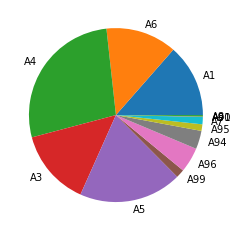

In [8]:
# 담보그룹코드별 세부담보건수 비율

MGG_GRP_arr = []
labels=[]
for i in df1.MGG_GRP_CD.unique():
    MGG_GRP_arr.append(df1_group["JOIN_SN"][i])
    labels.append(i)
plt.pie(MGG_GRP_arr, labels=labels)

<AxesSubplot:xlabel='MGG_GRP_CD', ylabel='MGG_AMT_SUM'>

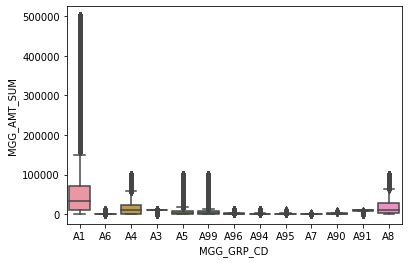

In [127]:
# 담보코드그룹 별 세부담보금액 삼자그림
sns.boxplot(x=df1["MGG_GRP_CD"], y=df1['MGG_AMT_SUM'], data=df1)

In [133]:
df1[df1["MGG_GRP_CD"] == "A1"].MGG_AMT_SUM.describe()

count    190549.000000
mean      53360.031173
std       65104.017606
min         100.000000
25%       11000.000000
50%       33000.000000
75%       70000.000000
max      500000.000000
Name: MGG_AMT_SUM, dtype: float64

In [9]:
# 차주정보
df2 = pd.read_csv("SDB4_A_ID.csv", encoding ='UTF8')

In [10]:
# 차주정보와 보험담보정보 merge

df3 = pd.merge(
        df1, df2, left_on="JOIN_SN", right_on="JOIN_SN"
    )
df3

,JOIN_SN,JOIN_SN_TYP_x,SCTR_CD,POL_SN,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,MGG_AMT_MAX,MGG_AMT_MIN,...,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006,JOIN_SN_TYP_y,BTH_YR,GENDER,IS_KRN
0,1492718,1,8,5418925,A1,A1300,1,65000,65000,65000,...,1,1,1,1,1,1,1,2003,1,1
1,1492718,1,8,5418925,A5,A5109,1,3900,3900,3900,...,1,1,1,1,1,1,1,2003,1,1
2,1492718,1,8,5418925,A5,A5309,1,3900,3900,3900,...,1,1,1,1,1,1,1,2003,1,1
3,1492718,1,8,5418925,A4,A4109,1,46000,46000,46000,...,1,1,1,1,1,1,1,2003,1,1
4,1492718,1,8,5418925,A4,A4102,1,59000,59000,59000,...,1,1,1,1,1,1,1,2003,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329474,395308,1,8,6684546,A3,A3412,1,9000,9000,9000,...,0,0,0,0,0,0,1,1962,1,1
1329475,1469668,1,6,7980396,A3,A3301,1,10000,10000,10000,...,1,1,1,1,1,1,1,1986,2,1
1329476,1915130,1,6,7326022,A3,A3399,1,10000,10000,10000,...,1,1,1,1,1,1,1,1996,2,1
1329477,584112,1,8,5059506,A3,A3301,1,10000,10000,10000,...,1,1,1,1,1,1,1,2001,2,1


In [14]:
df3['AGE'] = 2022 - df3['BTH_YR']
df3

,JOIN_SN,JOIN_SN_TYP_x,SCTR_CD,POL_SN,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,MGG_AMT_MAX,MGG_AMT_MIN,...,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006,JOIN_SN_TYP_y,BTH_YR,GENDER,IS_KRN,AGE
0,1492718,1,8,5418925,A1,A1300,1,65000,65000,65000,...,1,1,1,1,1,1,2003,1,1,19
1,1492718,1,8,5418925,A5,A5109,1,3900,3900,3900,...,1,1,1,1,1,1,2003,1,1,19
2,1492718,1,8,5418925,A5,A5309,1,3900,3900,3900,...,1,1,1,1,1,1,2003,1,1,19
3,1492718,1,8,5418925,A4,A4109,1,46000,46000,46000,...,1,1,1,1,1,1,2003,1,1,19
4,1492718,1,8,5418925,A4,A4102,1,59000,59000,59000,...,1,1,1,1,1,1,2003,1,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329474,395308,1,8,6684546,A3,A3412,1,9000,9000,9000,...,0,0,0,0,0,1,1962,1,1,60
1329475,1469668,1,6,7980396,A3,A3301,1,10000,10000,10000,...,1,1,1,1,1,1,1986,2,1,36
1329476,1915130,1,6,7326022,A3,A3399,1,10000,10000,10000,...,1,1,1,1,1,1,1996,2,1,26
1329477,584112,1,8,5059506,A3,A3301,1,10000,10000,10000,...,1,1,1,1,1,1,2001,2,1,21


In [17]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    elif x < 80:
        return 7
    elif x < 90:
        return 8

In [20]:
df3['AGE_CAT'] = df3['AGE'].apply(category_age)
df3

,JOIN_SN,JOIN_SN_TYP_x,SCTR_CD,POL_SN,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,MGG_AMT_MAX,MGG_AMT_MIN,...,YM_202003,YM_202004,YM_202005,YM_202006,JOIN_SN_TYP_y,BTH_YR,GENDER,IS_KRN,AGE,AGE_CAT
0,1492718,1,8,5418925,A1,A1300,1,65000,65000,65000,...,1,1,1,1,1,2003,1,1,19,1
1,1492718,1,8,5418925,A5,A5109,1,3900,3900,3900,...,1,1,1,1,1,2003,1,1,19,1
2,1492718,1,8,5418925,A5,A5309,1,3900,3900,3900,...,1,1,1,1,1,2003,1,1,19,1
3,1492718,1,8,5418925,A4,A4109,1,46000,46000,46000,...,1,1,1,1,1,2003,1,1,19,1
4,1492718,1,8,5418925,A4,A4102,1,59000,59000,59000,...,1,1,1,1,1,2003,1,1,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329474,395308,1,8,6684546,A3,A3412,1,9000,9000,9000,...,0,0,0,0,1,1962,1,1,60,6
1329475,1469668,1,6,7980396,A3,A3301,1,10000,10000,10000,...,1,1,1,1,1,1986,2,1,36,3
1329476,1915130,1,6,7326022,A3,A3399,1,10000,10000,10000,...,1,1,1,1,1,1996,2,1,26,2
1329477,584112,1,8,5059506,A3,A3301,1,10000,10000,10000,...,1,1,1,1,1,2001,2,1,21,2


In [30]:
age_cnt = df3.groupby(["MGG_GRP_CD", "AGE_CAT"]).count()
age_cnt


JOIN_SN  JOIN_SN_TYP_x  SCTR_CD  POL_SN  MGG_CD  MGG_CNT  \
MGG_GRP_CD AGE_CAT                                                             
A1         1           6113           6113     6113    6113    6113     6113   
           2          23238          23238    23238   23238   23238    23238   
           3          34712          34712    34712   34712   34712    34712   
           4          33835          33835    33835   33835   33835    33835   
           5          30995          30995    30995   30995   30995    30995   
...                     ...            ...      ...     ...     ...      ...   
A99        4           3103           3103     3103    3103    3103     3103   
           5           3175           3175     3175    3175    3175     3175   
           6           2578           2578     2578    2578    2578     2578   
           7           1223           1223     1223    1223    1223     1223   
           8            200            200      200     200     200      200   

                    MGG_AMT_SUM  MGG_AMT_MAX  MGG_AMT_MIN  YM_201806  ...  \
MGG_GRP_CD AGE_CAT                                                    ...   
A1         1               6113         6113         6113       6113  ...   
           2              23238        23238        23238      23238  ...   
           3              34712        34712        34712      34712  ...   
           4              33835        33835        33835      33835  ...   
           5              30995        30995        30995      30995  ...   
...                         ...          ...          ...        ...  ...   
A99        4               3103         3103         3103       3103  ...   
           5               3175         3175         3175       3175  ...   
           6               2578         2578         2578       2578  ...   
           7               1223         1223         1223       1223  ...   
           8                200          200          200        200  ...   

                    YM_202002  YM_202003  YM_202004  YM_202005  YM_202006  \
MGG_GRP_CD AGE_CAT                                                          
A1         1             6113       6113       6113       6113       6113   
           2            23238      23238      23238      23238      23238   
           3            34712      34712      34712      34712      34712   
           4            33835      33835      33835      33835      33835   
           5            30995      30995      30995      30995      30995   
...                       ...        ...        ...        ...        ...   
A99        4             3103       3103       3103       3103       3103   
           5             3175       3175       3175       3175       3175   
           6             2578       2578       2578       2578       2578   
           7             1223       1223       1223       1223       1223   
           8              200        200        200        200        200   

                    JOIN_SN_TYP_y  BTH_YR  GENDER  IS_KRN    AGE  
MGG_GRP_CD AGE_CAT                                                
A1         1                 6113    6113    6113    6113   6113  
           2                23238   23238   23238   23238  23238  
           3                34712   34712   34712   34712  34712  
           4                33835   33835   33835   33835  33835  
           5                30995   30995   30995   30995  30995  
...                           ...     ...     ...     ...    ...  
A99        4                 3103    3103    3103    3103   3103  
           5                 3175    3175    3175    3175   3175  
           6                 2578    2578    2578    2578   2578  
           7                 1223    1223    1223    1223   1223  
           8                  200     200     200     200    200  

[103 rows x 39 columns]

In [31]:
df3.MGG_GRP_CD.unique()

array(['A1', 'A5', 'A4', 'A6', 'A3', 'A96', 'A94', 'A99', 'A8', 'A7',
       'A95', 'A90', 'A91'], dtype=object)

In [87]:
# dfs={}
# dfs["A1"] = df3[df3["MGG_GRP_CD"] == "A1"]
# dfs["A3"] = df3[df3["MGG_GRP_CD"] == "A3"]
# dfs["A4"] = df3[df3["MGG_GRP_CD"] == "A4"]
# dfs["A4"] = df3[df3["MGG_GRP_CD"] == "A5"]
# dfs["A4"] = df3[df3["MGG_GRP_CD"] == "A6"]
# dfs["A4"] = df3[df3["MGG_GRP_CD"] == "A7"]
# dfs["A4"] = df3[df3["MGG_GRP_CD"] == "A8"]
# dfs["A4"] = df3[df3["MGG_GRP_CD"] == "A90"]
# A91 = df3[df3["MGG_GRP_CD"] == "A91"]
# A94 = df3[df3["MGG_GRP_CD"] == "A94"]
# A95 = df3[df3["MGG_GRP_CD"] == "A95"]
# A96 = df3[df3["MGG_GRP_CD"] == "A96"]
# A99 = df3[df3["MGG_GRP_CD"] == "A99"]
# dfs["A1"]

In [88]:
dfs = {}
for a in df3.MGG_GRP_CD.unique():
    dfs[a] = df3[df3["MGG_GRP_CD"] == a]

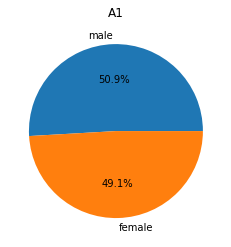

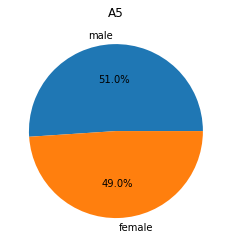

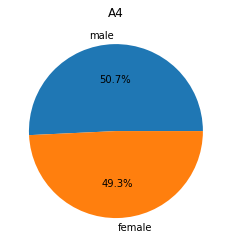

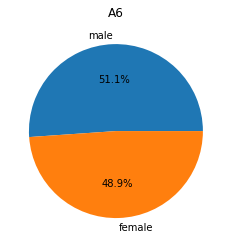

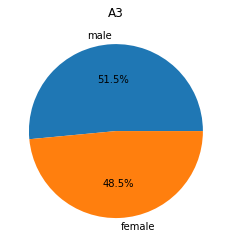

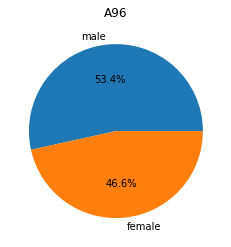

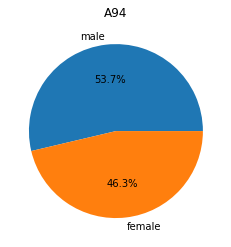

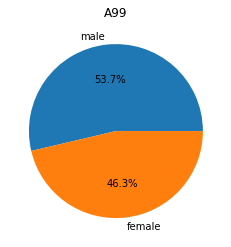

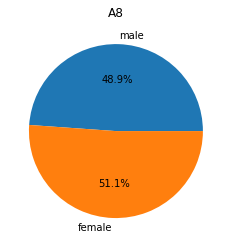

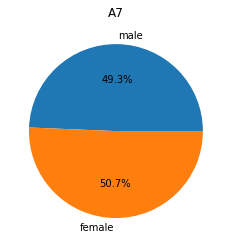

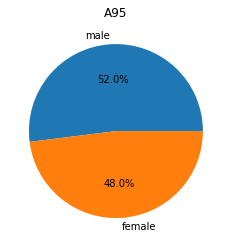

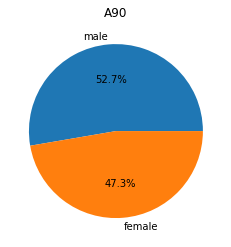

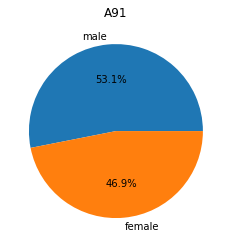

In [98]:
# 보험담보그룹 별 성별 비율

for a in df3.MGG_GRP_CD.unique():
    df = dfs[a]
    gender_cnt = df.groupby("GENDER").count()
    male = gender_cnt["JOIN_SN"][1]
    female = gender_cnt["JOIN_SN"][2]
    sum_gender = male + female

    ratio = [male/sum_gender*100, female/sum_gender*100]
    labels = ["male", "female"]

    plt.pie(ratio, labels=labels, autopct='%.1f%%')
    plt.title(a)
    plt.show()

[1 7 3 2 5 6 4 8]


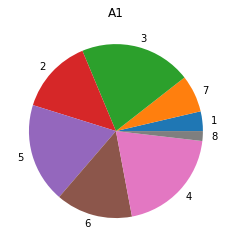

[1 7 3 2 5 6 4 8]


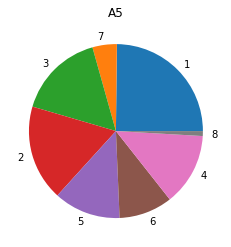

[1 7 3 2 5 6 4 8]


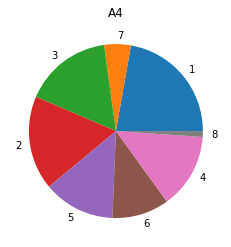

[1 7 3 2 5 6 4 8]


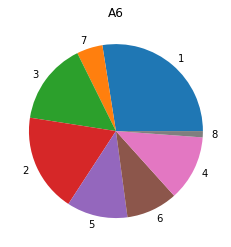

[7 1 3 2 5 6 4 8]


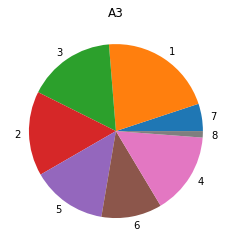

[1 3 2 5 4 6 7 8]


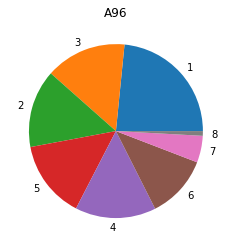

[3 2 6 1 4 5 7 8]


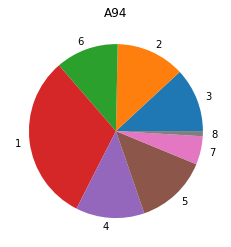

[3 2 6 4 1 5 7 8]


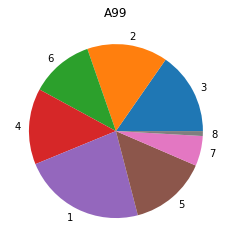

[2 3 6 5 4 1 7 8]


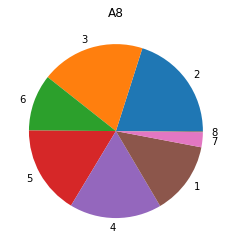

[2 3 5 6 4 1 7 8]


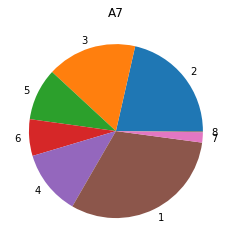

[3 1 2 6 5 4 8 7]


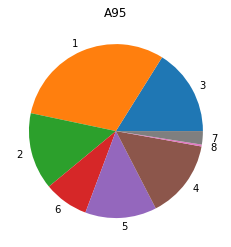

[3 2 6 8 1 4 7 5]


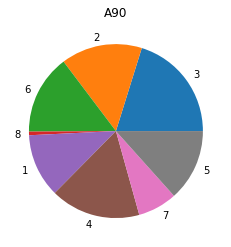

[3 6 2 5 4 7 1]


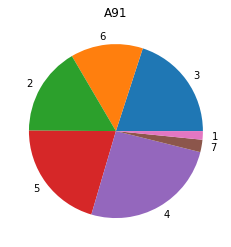

In [110]:
# 보험담보그룹 별 나이대 비율

for a in df3.MGG_GRP_CD.unique():
    df = dfs[a]
    age_cnt = df.groupby("AGE_CAT").count()
    age_arr = []
    labels = []
    print(df.AGE_CAT.unique())
#     print(age_cnt)
    for i in df.AGE_CAT.unique():
        if age_cnt["AGE"][i]:
            age_arr.append(age_cnt["AGE"][i])
            labels.append(i)
    plt.pie(age_arr, labels=labels)
    plt.title(a)
    plt.show()

In [114]:
dfs_age = {}
for n in df3.AGE_CAT.unique():
    dfs_age[n] = df3[df3["AGE_CAT"] == n]

['A1' 'A5' 'A4' 'A6' 'A3' 'A96' 'A95' 'A94' 'A99' 'A7' 'A90' 'A8' 'A91']


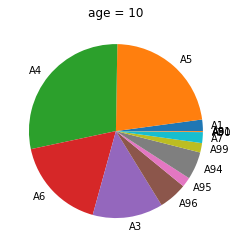

['A6' 'A3' 'A5' 'A1' 'A4' 'A99' 'A96' 'A94' 'A7' 'A95' 'A8' 'A90' 'A91']


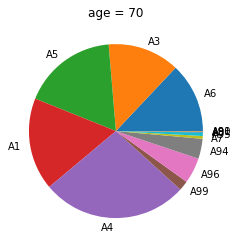

['A6' 'A96' 'A1' 'A4' 'A3' 'A5' 'A94' 'A99' 'A7' 'A95' 'A90' 'A8' 'A91']


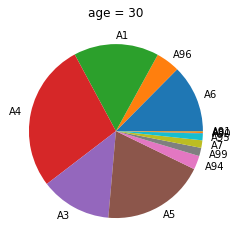

['A3' 'A6' 'A4' 'A5' 'A94' 'A1' 'A8' 'A99' 'A7' 'A96' 'A95' 'A90' 'A91']


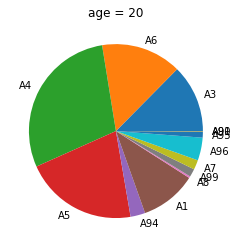

['A3' 'A6' 'A4' 'A5' 'A1' 'A7' 'A96' 'A94' 'A99' 'A95' 'A8' 'A91' 'A90']


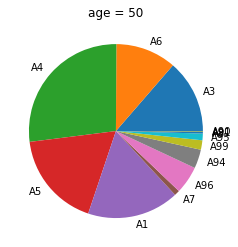

['A1' 'A4' 'A5' 'A3' 'A94' 'A6' 'A7' 'A99' 'A96' 'A95' 'A90' 'A8' 'A91']


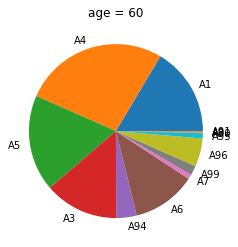

['A3' 'A96' 'A5' 'A4' 'A1' 'A6' 'A99' 'A94' 'A7' 'A8' 'A95' 'A90' 'A91']


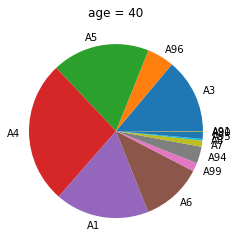

['A4' 'A5' 'A1' 'A6' 'A3' 'A99' 'A96' 'A94' 'A90' 'A95' 'A7' 'A8']


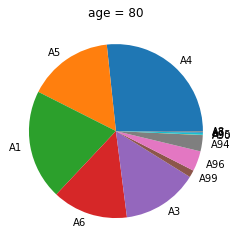

In [120]:
# 나이대별 보험담보그룹 비율

for n in df3.AGE_CAT.unique():
    df = dfs_age[n]
    mgg_cnt = df.groupby("MGG_GRP_CD").count()
    mgg_arr = []
    labels = []
    print(df.MGG_GRP_CD.unique())
#     print(age_cnt)
    for i in df.MGG_GRP_CD.unique():
        if mgg_cnt["JOIN_SN"][i]:
            mgg_arr.append(mgg_cnt["JOIN_SN"][i])
            labels.append(i)
    plt.pie(mgg_arr, labels=labels)
    plt.title(f"age = {n}0")
    plt.show()

In [122]:
# 담보그룹별 세부담보
for a in df3.MGG_GRP_CD.unique():
    df = dfs[a]
    print(df.MGG_CD.unique())

['A1300' 'A1100' 'A1199' 'A1399' 'A1403' 'A1499' 'A1400' 'A1200' 'A1404'
 'A1401' 'A1299' 'A1301' 'A1101']
['A5109' 'A5309' 'A5999' 'A5100' 'A5399' 'A5200' 'A5300' 'A5299' 'A5301'
 'A5302' 'A5199' 'A5508' 'A5107' 'A5104' 'A5310' 'A5101']
['A4109' 'A4102' 'A4200' 'A4199' 'A4104' 'A4399' 'A4210' 'A4301' 'A4103'
 'A4302' 'A4299' 'A4303' 'A4209' 'A4304' 'A4101' 'A4105' 'A4504' 'A4502'
 'A4110' 'A4501' 'A4503' 'A4201']
['A6150' 'A6999' 'A6350' 'A6300' 'A6105' 'A6100' 'A6302' 'A6200' 'A6400'
 'A6510' 'A6550' 'A6107' 'A6112' 'A6103' 'A6113' 'A6115' 'A6201' 'A6119'
 'A6109' 'A6114' 'A6118' 'A6301' 'A6101' 'A6303' 'A6120' 'A6117' 'A6116']
['A3199' 'A3399' 'A3300' 'A3101' 'A3301' 'A3413' 'A3400' 'A3412' 'A3499'
 'A3403' 'A3303' 'A3100' 'A3401' 'A3103' 'A3404' 'A3416' 'A3415']
['A9617' 'A9601' 'A9608' 'A9606' 'A9609' 'A9611' 'A9600' 'A9607' 'A9604'
 'A9605' 'A9614' 'A9612' 'A9613' 'A9616' 'A9610' 'A9615' 'A9603' 'A9602']
['A9408' 'A9401' 'A9499' 'A9400' 'A9406' 'A9404' 'A9405' 'A9403' 'A9402'
 'A